# Mid Term Task - Machine Learning Class

Name                    : Axel David<br>
NIM                     : 1103210017<br>
Class                   : TK-45-04<br>
Tools                   : Jupyter Notebook<br>
Dataset                 : [Credit score classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)<br>
Chat-GPT Documentation  :

### Problem Statement
Imagine working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task Goal
Given a person's credit-related information. 
Build machine learning models that can classify the credit score with >95% accuracy using Orange and Python
(1 model minimum)

# ==================================

## Programs

### Import Dataset

In [1]:
# Downloading the Dataset using Kaggle API
!kaggle datasets download -d parisrohan/credit-score-classification

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
credit-score-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Unzipping the Dataset
import zipfile

with zipfile.ZipFile("credit-score-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("Dataset")

print("File unzipped successfully!")

File unzipped successfully!


### Dataset Information

#### <li>Train Data</li>

In [3]:
import pandas as pd

# Read CSV File
train_df = pd.read_csv(r'Dataset\train.csv')
# Show Information
train_df.info()
# Show Head
train_df.head()
# Show Tail
train_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

C:\Users\axeld\AppData\Local\Temp\ipykernel_34220\1878762977.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r'Dataset\train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


### Preprocessing Data

#### <li>Data Formatting</li>

In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert month names to numerical values
month_encoder = LabelEncoder()
train_df['Month'] = month_encoder.fit_transform(train_df['Month'])
test_df = train_df

#### <li>Negative Values</li>

In [5]:
# Check for negative values and replace with NaN
numeric_columns = train_df.select_dtypes(include='number').columns
train_df[numeric_columns][train_df[numeric_columns] < 0] = np.nan
test_df[numeric_columns][test_df[numeric_columns] < 0] = np.nan

C:\Users\axeld\AppData\Local\Temp\ipykernel_34220\1762409266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numeric_columns][train_df[numeric_columns] < 0] = np.nan
C:\Users\axeld\AppData\Local\Temp\ipykernel_34220\1762409266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numeric_columns][train_df[numeric_columns] < 0] = np.nan
C:\Users\axeld\AppData\Local\Temp\ipykernel_34220\1762409266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

#### <li>Remove Dupicates</li>

In [6]:
# Remove duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

#### <li>Mising Values</li>

In [7]:
# Impute missing values with deleting rows of data
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [8]:
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  int32  
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_from_

### Feature Engineering

#### <li>Select Relevant Features</li>

In [9]:
# Select relevant columns
columns_to_keep = ['Credit_Score','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
                   'Interest_Rate','Delay_from_due_date','Num_Credit_Inquiries',
                   'Credit_Utilization_Ratio','Total_EMI_per_month']

In [10]:
train_df = train_df[columns_to_keep]
test_df = test_df[columns_to_keep]

#### <li>Select Target Variable</li>

In [11]:
# Separate features and target variable
X_train = train_df.drop("Credit_Score", axis=1)
y_train = train_df["Credit_Score"]
X_test = test_df

### Random Forest

#### <li>Create a Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on training set
train_pred = rf_classifier.predict(X_train)

# Evaluate training accuracy
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 1.0


#### <li>Calculate Confusion Matrix

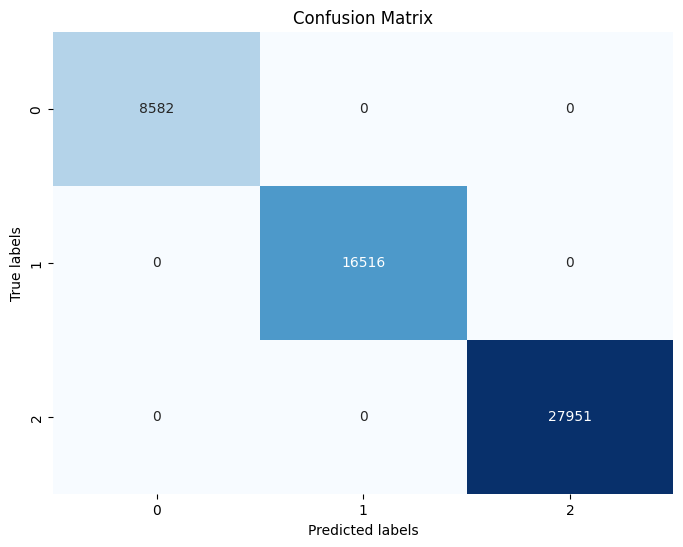

In [13]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, train_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#### <li>Predict Credit_Score in the Test.csv</li>

In [14]:
readytotest_df = pd.read_csv(r'Dataset\test.csv')

# Copy the DataFrame and exclude the 'Credit_Score' column
columns_to_keep_copy = columns_to_keep.copy()
columns_to_keep_copy.remove("Credit_Score")
readytotest_df = readytotest_df[columns_to_keep_copy]

In [15]:
# Predict Credit_Score for test set
test_pred = rf_classifier.predict(readytotest_df)

# Display the predicted Credit_Score values for the test dataset
print("Predicted Credit_Score for test dataset:")
print(test_pred)

Predicted Credit_Score for test dataset:
['Good' 'Good' 'Good' ... 'Standard' 'Standard' 'Standard']


#### <li>Evaluate Accuracy of Training Dataset to Test Dataset</li>

In [17]:
# Evaluate training accuracy
test_accuracy = accuracy_score(y_train[:len(test_pred)], test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.40518
